In [26]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from collections import defaultdict


In [27]:
# read the dataset
df = pd.read_csv('survey_results_public.csv')

df_schema = pd.read_csv('survey_results_schema.csv')

# Exploring the Dataset

In [28]:
df.shape

(51392, 154)

In [29]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# analyzing missing data in columns
df.isnull().sum().sort_values()

Respondent                       0
Professional                     0
ProgramHobby                     0
Country                          0
University                       0
EmploymentStatus                 0
FormalEducation                  0
YearsProgram                   247
PronounceGIF                   384
HomeRemote                    7384
MajorUndergrad                8551
CareerSatisfaction            8697
ClickyKeys                    9346
YearsCodedJob                10502
JobSatisfaction              11016
CompanySize                  12470
TabsSpaces                   12541
CompanyType                  12569
StackOverflowDescribes       14460
WorkStart                    14696
HaveWorkedLanguage           14767
StackOverflowSatisfaction    14800
AuditoryEnvironment          14935
DeveloperType                15267
IDE                          15562
StackOverflowDevices         16189
Gender                       16345
HighestEducationParents      16454
SurveyLong          

In [31]:
df_schema.set_index('Column', inplace=True)

In [32]:
# find columns with more than %35 missing values
list(df.columns[df.isnull().mean() > 0.35])

['YearsCodedJobPast',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeaders',
 'AssessJobProfDevel',
 'AssessJobDiversity',
 'AssessJobProduct',
 'AssessJobFinances',
 'ImportantBenefits',
 'JobProfile',
 'ResumePrompted',
 'LearnedHiring

### Q1. What programming language is mostly used by developers?
### Q2. What type of developers participated in the survey?
### Q3. How satisfied are developers in their career?

# Preproecessing Dataset

In [33]:
# This code is obtained from udacity lesson
def get_description(column_name, schema=df_schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc


In [34]:
df.isnull().sum().sum()

3586951

In [35]:
# fill NaN with None
df = df.fillna('None')

In [36]:
def split_value(df, col_name, separator):
    '''
    INPUT - df  -  dataframe -  original dataframe
            col_name - string - column name
            separator - string - the seprator between the data
    OUTPUT - 
            df - dataframe - seprated values
    '''
    df = pd.DataFrame(df[col_name].dropna().str.split(separator).tolist()).stack()
    return df

## Q1. What programming language is mostly used by developers?

In [37]:
split_worked_language = split_value(df, 'HaveWorkedLanguage','; ')
split_worked_language = split_worked_language.value_counts()
split_worked_language = split_worked_language.drop(split_worked_language.index[2])

In [38]:
split_worked_language.head(15)

JavaScript     22875
SQL            18754
Java           14524
C#             12476
Python         11704
PHP            10290
C++             8155
C               6974
TypeScript      3488
Ruby            3324
Swift           2368
Objective-C     2349
VB.NET          2273
Assembly        1823
R               1634
dtype: int64

Text(0.5, 1.0, 'Programming language used at work')

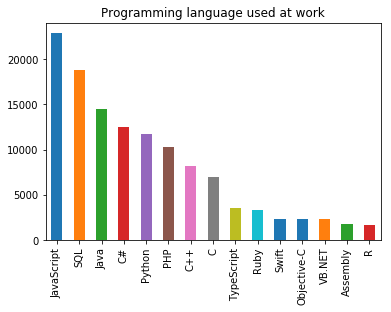

In [39]:
split_worked_language.head(15).plot(kind='bar')

plt.title('Programming language used at work')

In [40]:
split_wanted_language = split_value(df, 'WantWorkLanguage','; ')
split_wanted_language = split_wanted_language.value_counts()
split_wanted_language = split_wanted_language.drop(split_wanted_language.index[0])

In [41]:
split_wanted_language.head(15)

JavaScript    16327
Python        12570
SQL           11217
C#            10187
Java           9988
C++            7647
Go             5770
TypeScript     5692
PHP            5365
C              4841
Swift          4530
Ruby           3966
Scala          3122
Rust           2718
R              2628
dtype: int64

Text(0.5, 1.0, 'Programming language developers want to use by next year')

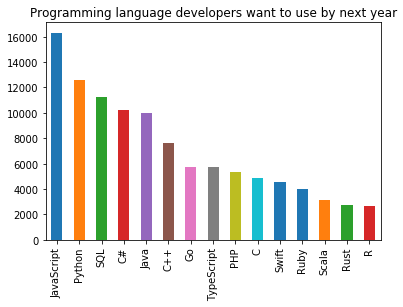

In [42]:
split_wanted_language.head(15).plot(kind='bar')

plt.title('Programming language developers want to use by next year')

## Q2. What type of developers participated in the survey?

In [43]:
df.DeveloperType.value_counts()

None                                                                                                                                                                                                                                             15267
Web developer                                                                                                                                                                                                                                    10683
Web developer; Desktop applications developer                                                                                                                                                                                                     1849
Mobile developer                                                                                                                                                                                                                                  1556
Web develope

In [44]:
split_developer_type = split_value(df, 'DeveloperType','; ')
split_developer_type = split_developer_type.value_counts()
split_developer_type = split_developer_type.drop(split_developer_type.index[1])

In [45]:
split_developer_type.head(15)

Web developer                                            26235
Desktop applications developer                           10435
Mobile developer                                          8326
Database administrator                                    5192
Developer with a statistics or mathematics background     4091
Systems administrator                                     4086
DevOps specialist                                         4015
Embedded applications/devices developer                   3352
Data scientist                                            3045
Other                                                     2694
Graphics programming                                      1731
Graphic designer                                          1426
Machine learning specialist                               1379
Quality assurance engineer                                1252
dtype: int64

In [46]:
df.WebDeveloperType.value_counts()

None                        40696
Full stack Web developer     6816
Back-end Web developer       2610
Front-end Web developer      1270
Name: WebDeveloperType, dtype: int64

Text(0.5, 1.0, 'Participating developers type')

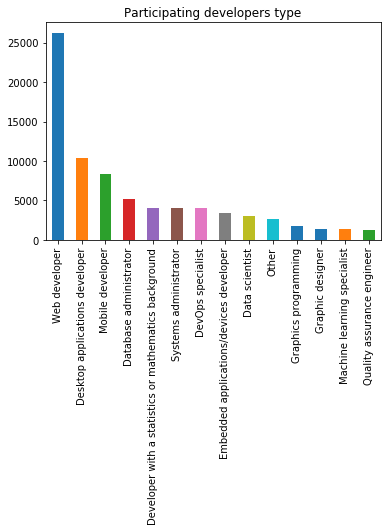

In [73]:
split_developer_type.head(15).plot(kind='bar')

plt.title('Participating developers type')

## Q3. How satisfied are developers in their career?

In [48]:
x = df[df.CareerSatisfaction != 'None']
x = x.CareerSatisfaction.value_counts()
x = x.sort_index()

Text(0.5, 1.0, 'Developers satisfaction in their career')

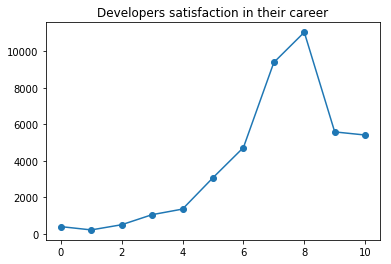

In [49]:
x.plot(kind='line', marker='o')

plt.title('Developers satisfaction in their career')

In [50]:
x #11,300

0.0       392
1.0       211
2.0       495
3.0      1046
4.0      1352
5.0      3070
6.0      4721
7.0      9384
8.0     11037
9.0      5579
10.0     5408
Name: CareerSatisfaction, dtype: int64